In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.preprocessing import scale
import numpy as np

In [2]:
df = pd.read_csv('diabetes.csv')

In [34]:
df.replace({0:None}, inplace=True)
df['Outcome'].replace({None:0}, inplace=True)
df['Pregnancies'].replace({None:0}, inplace=True)

df.dropna(axis=0, thresh=8, inplace=True)
df.replace({np.nan:0}, inplace=True)

x, y = scale(df.drop(columns=['Outcome']).values), df['Outcome'].values

In [35]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state = 0)

In [36]:
reg = LogisticRegressionCV().fit(x_train, y_train)

In [37]:
reg.score(x_test, y_test)

0.7890625

In [23]:
reg.Cs_

array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])

In [38]:
predict = reg.predict(x_test)

In [39]:
confusion_matrix(y_test, predict)

array([[72,  3],
       [24, 29]], dtype=int64)

In [41]:
residuals = predict - y_test

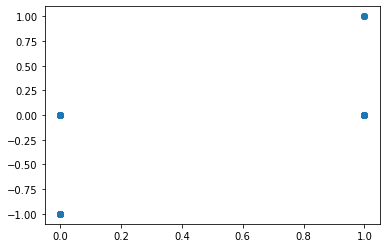

In [42]:
plt.scatter(predict, residuals)

In [40]:
matthews_corrcoef(y_test, predict)

0.5769143685844939